<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/IC_1805/IC_1805_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [325]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [326]:
!pip install astroquery

In [327]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


#### Finding GAIA Data

In [328]:
## making a GAIA cone_search of 30m radius around IC1805 center

coordinate = coord.SkyCoord.from_name('IC1805')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (38.175, 61.45)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [329]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 465528726379405696,465528726379405696,247964031,2015.5,38.177112,0.554648,61.450483,0.609400,1.765231,0.769221,2.294829,-1.217923,0.935301,0.826493,1.208420,0.110764,0.039704,-0.548879,0.208537,-0.306737,0.181764,0.092372,-0.152621,-0.059522,0.098671,272,0,270,2,5.630649,416.011017,2.240920,3.162287,31,False,0.032422,1.050447,0.128913,-0.059176,...,365.432711,12.216329,29.913464,18.354902,3.558765,0,1.338949,-0.524485,1.863434,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726376,0.919658,58.803635,43.504977,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001112
1,1635721458409799680,Gaia DR2 465528722077474176,465528722077474176,532618104,2015.5,38.173126,0.195596,61.448828,0.223026,0.485018,0.273150,1.775644,-1.252496,0.308658,-0.557193,0.520266,0.090727,0.080372,-0.703858,0.043827,-0.001763,0.011196,-0.234885,-0.112208,-0.194637,0.132936,350,0,348,2,2.492240,411.750702,0.597085,1.231175,31,False,0.225304,1.251449,0.045914,-0.025778,...,728.827109,9.462338,77.024002,17.605358,2.025694,0,2.002157,0.570684,1.431473,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.725244,0.917403,58.800282,43.504305,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001479
2,1635721458409799680,Gaia DR2 465528726379405440,465528726379405440,1283651393,2015.5,38.172314,0.423892,61.451231,0.538058,0.062564,0.635088,0.098512,1.224278,0.695127,0.686585,1.155529,-0.032334,0.062870,-0.658227,0.092028,-0.183861,0.026078,0.209751,-0.043140,0.064907,-0.108643,286,0,284,2,4.475788,397.799500,1.678573,2.132602,31,False,0.048033,1.173376,0.107343,-0.088620,...,377.982854,8.946186,42.250725,18.318239,3.174750,0,1.303114,-0.424246,1.727360,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723971,0.919477,58.801227,43.506640,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001785
3,1635721458409799680,Gaia DR2 465528726379405056,465528726379405056,181327803,2015.5,38.178915,0.149113,61.450697,0.164303,0.618628,0.205993,3.003147,-0.576566,0.267372,0.189691,0.370243,0.072195,-0.050279,-0.611804,0.154452,-0.259068,-0.004170,0.083585,0.111078,-0.174088,-0.122973,259,0,256,3,2.311016,305.660400,0.484698,1.279618,31,False,0.446387,1.381541,0.036848,-0.009684,...,1064.630714,24.601653,43.274765,17.193922,1.941268,0,1.815165,0.472721,1.342443,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.727092,0.920184,58.804834,43.504799,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001989
4,1635721458409799680,Gaia D

##### Applying Filter:

In [330]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [331]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [332]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered['pmdec_over_error'] > 3) & (all_stars_filtered['pmra_over_error'] > 3)]

In [333]:
all_stars_filtered.shape

(14485, 99)

##### Visualizing GAIA data

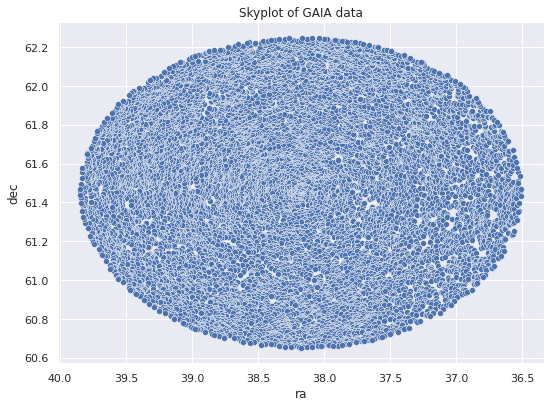

In [334]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [335]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [336]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [337]:
## saving only IC 1805 data from Cantat GAIA DR2 paper

cantat_1805 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="IC_1805")
cantat_1805 = cantat_1805[0].to_pandas()
cantat_1805

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,38.153592,61.130890,465452928793998720,0.3521,-0.476,-0.863,NaN,17.732300,2.5744,0.3,IC_1805,38.153596,61.130894
1,38.148031,61.117989,465452894434262528,0.3413,-1.027,-0.231,NaN,16.749500,1.6401,0.3,IC_1805,38.148040,61.117990
2,38.253198,61.651232,465540335670181504,0.4672,-0.453,-0.891,NaN,17.607300,2.2985,0.4,IC_1805,38.253202,61.651235
3,38.300182,61.354941,465480382225858304,0.3881,-0.664,-0.846,NaN,14.744000,1.1821,1.0,IC_1805,38.300188,61.354945
4,38.429289,61.316453,465479248354610944,0.4768,-0.486,-1.095,NaN,17.565599,1.6560,0.4,IC_1805,38.429293,61.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,38.559873,61.603712,465911562577451264,0.4788,-0.142,-0.669,NaN,17.171600,1.6082,0.2,IC_1805,38.559874,61.603715
452,38.242582,61.758806,465917300660039296,0.3388,-1.648,-0.124,NaN,16.572800,1.2593,0.1,IC_1805,38.242597,61.758806
453,38.561836,61.703254,465913310627212672,0.4396,-0.690,-0.448,NaN,13.340600,0.8793,0.8,IC_1805,38.561842,61.703256
454,38.239475,61.768696,465929047388139008,0.3782,-0.733,0.198,NaN,17.888201,1.8055,0.1,IC_1805,38.239482,61.768695


In [338]:
# renaming the cantat table to match it with gaia_data
cantat_1805 = cantat_1805.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [339]:
# taking the subset of only source_id and PMemb
cantat_1805 = cantat_1805.loc[:,['source_id', 'PMemb']]


In [340]:
# join the two table on source_id
cantat_1805 = all_stars_filtered.join(cantat_1805.set_index('source_id'), on='source_id')

In [341]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1805 = cantat_1805.dropna(subset=['PMemb'])
cantat_1805

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
9,1635721458409799680,Gaia DR2 465528726379407232,465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,15.641562,1.544088,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721350,0.916426,58.795684,43.506540,102001,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004912,10.927295,9.372518,0.6
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,9.807837,16.348635,0.3
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,29.000888,22.111231,1.0
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17

In [342]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1805.to_csv('IC_1805_cantat.csv')
# all_stars.to_csv('IC_1805_Gaia_30m.csv')

In [343]:
cantat_1805.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,2.370000e+02,2.370000e+02,2.370000e+02,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,2.370000e+02,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,4.000000,4.000000,237.000000,4.000000,4.000000,4.0000,237.000000,237.000000,237.000000,237.000000,198.000000,198.000000,198.000000,198.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,237.000000,237.000000,237.000000,237.000000
mean,1.635721e+18,4.655548e+17,8.478835e+08,2015.5,38.194002,0.037564,61.488153,0.038491,0.437246,0.049988,11.968811,-0.771412,0.056904,-0.626431,0.084236,-0.023287,0.052025,-0.757002,0.057237,0.036497,0.044013,-0.276112,-0.033911,0.027420,-0.012209,395.472574,53.021097,392.101266,3.371308,1.184547,444.562592,0.067128,1.052152,31.0,60.382153,1.479734,0.008308,-0.044446,45.012658,15.514768,...,1.343370e+05,189.724794,685.564392,14.295773,1.334098,0.168776,1.487658,0.667567,0.820091,-42.153129,2.393810,0.172996,4687.500000,2.625000,0.0625,134.719352,0.957797,58.836194,43.535603,100082.101010,4715.587891,4529.887207,5014.738770,2.193670,1.880604,2.534620,1.108867,0.942173,1.288302,200111.0,5.865198,5.259096,6.319592,65.643898,57.322128,73.965660,0.159410,18.147146,10.058031,0.584388
std,0.000000e+00,9.882209e+13,4.833116e+08,0.0,0.273249,0.022972,0.126619,0.021759,0.051515,0.029915,6.313267,0.254520,0.035316,0.334745,0.047055,0.108359,0.112440,0.032209,0.088823,0.081361,0.089386,0.129730,0.086256,0.088768,0.087676,36.405501,134.006907,36.191555,5.856087,5.841529,202.802246,0.106116,2.999830,0.0,102.540886,0.093107,0.004959,0.032551,4.030058,1.031697,...,7.722176e+05,1111.138579,485.683716,1.823506,0.109496,0.375347,0.480803,0.277063,0.216880,14.362667,1.581258,1.437847,554.338928,0.853913,0.1250,0.126610,0.130507,0.184020,0.123521,395.288997,727.639526,715.137817,756.673279,0.504829,0.507065,0.432164,0.249023,0.248554,0.224389,0.0,7.147449,6.707637,7.571912,322.742828,280.662262,364.846924,0.095411,10.570753,5.857147,0.305960
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,3.256174,-1.653909,0.019533,-1.281146,0.029553,-0.491299,-0.253159,-0.877849,-0.230253,-0.187959,-0.152813,-0.651846,-0.306789,-0.160690,-0.366241,214.000000,0.000000,210.00000

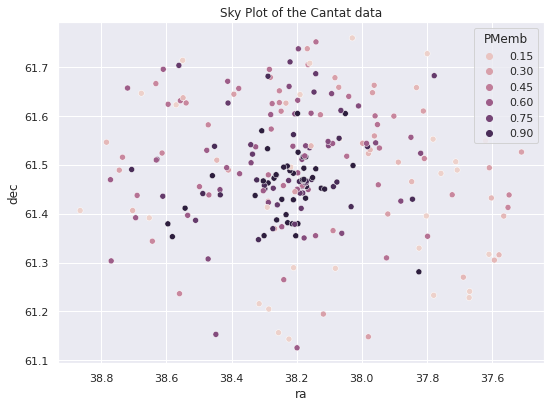

In [344]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_1805['ra'], y = cantat_1805['dec'], 
                          hue = cantat_1805['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [345]:
# import member dataset
member = cantat_1805.copy()

In [346]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1805_center'] = distance

In [347]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_1805_center)
cantat_radius

0.3331499251669058

In [348]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
9,1635721458409799680,Gaia DR2 465528726379407232,465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721350,0.916426,58.795684,43.506540,102001,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004912,10.927295,9.372518,0.6,0.004904,1
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,9.807837,16.348635,0.3,0.005841,1
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,29.000888,22.111231,1.0,0.006043,1
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa

In [349]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1805_center'] = distance

In [350]:
non_member = all_stars_filtered[all_stars_filtered['dist_1805_center'] >= 0.7].sample(len(member), random_state = 42)

In [351]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member
95539,1635721458409799680,Gaia DR2 465947502870991488,465947502870991488,905688223,2015.5,39.112904,0.025755,62.034378,0.025894,1.137646,0.039442,28.843372,-6.754705,0.042558,2.146863,0.058427,-0.066507,0.100111,-0.686961,-0.053486,0.106325,0.006072,-0.210701,-0.140083,0.150338,0.048501,389,0,387,2,0.218272,387.391663,0.000000,0.000000,31,False,12.911139,1.465921,0.006395,-0.069324,...,1.283832,0,1.463523,0.667032,0.796491,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.908782,1.629544,59.703519,43.841969,100001,4442.290039,4404.810059,4599.609863,NaN,NaN,NaN,NaN,NaN,NaN,200111,1.128146,1.052294,1.147426,0.446533,0.411130,0.481935,https://gea.esac.esa.int/data-server/datalink/...,,0.733922,158.716586,36.744272,0.731397,0
99310,1635721458409799680,Gaia DR2 465264323888240128,465264323888240128,744648474,2015.5,39.070791,0.054205,60.838251,0.058194,2.222158,0.066642,33.344460,7.347336,0.073504,-14.498614,0.130698,0.205819,0.078483,-0.848943,-0.061293,0.019724,-0.162634,-0.463124,-0.031946,0.070333,0.154994,433,0,429,4,2.279817,493.176910,0.192156,2.145404,31,False,4.056425,1.393219,0.009767,-0.041117,...,1.372890,0,2.042186,1.024616,1.017570,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,135.360987,0.521973,58.981067,42.767376,100001,3910.939941,3682.000000,4320.729980,0.7667,0.5182,1.183,0.3680,0.2269,0.5527,200111,0.563684,0.461832,0.635961,0.066972,0.062711,0.071233,https://gea.esac.esa.int/data-server/datalink/...,,0.749068,99.958559,110.931834,0.751510,0
97254,1635721458409799680,Gaia DR2 513556871744320768,513556871744320768,1101176956,2015.5,36.636589,0.019017,61.365785,0.018418,1.372484,0.026888,51.043694,3.437027,0.029335,4.445645,0.042096,-0.162663,-0.033282,-0.788646,-0.113302,0.028798,0.060887,-0.437597,-0.044335,0.047034,0.042759,545,0,545,0,-1.695837,485.543030,0.000000,0.000000,31,False,26.967970,1.499540,0.004058,-0.057250,...,1.275252,0,1.410584,0.638007,0.772577,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.072663,0.568364,57.836213,43.750589,100001,4488.620117,4419.000000,4717.810059,1.1495,0.7412,1.555,0.6317,0.3709,0.7905,200111,1.281168,1.159714,1.321855,0.600286,0.570950,0.629623,https://gea.esac.esa.int/data-server/datalink/...,,0.741030,117.165033,105.608101,0.742025,0
99599,1635721458409799680,Gaia DR2 513608995467976320,513608995467976320,583566002,2015.5,36.994111,0.080096,61.949387,0.073924,0.635530,0.107179,5.929592,3.052951,0.133879,0.707294,0.158704,-0.180503,-0.074312,-0.810633,-0.103746,-0.060621,0.055904,-0.552155,0.099958,0.122652,0.036537,569,0,568,1,0.868720,591.967102,0.000000,0.000000,31,False,1.480304,1.348679,0.016016,-0.016672,...,1.410646,0,1.954205,0.926062,1.028143,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.019995,1.173859,58.406572,44.198836,<NA>,NaN,NaN,NaN,NaN,NaN,N

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


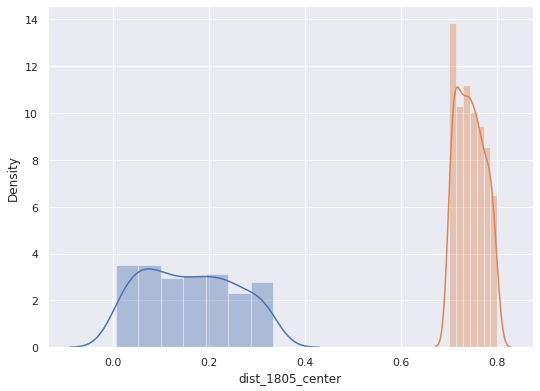

In [352]:
sns.distplot(member['dist_1805_center'])
sns.distplot(non_member['dist_1805_center'])
plt.show()

In [353]:
training_data = pd.concat([member, non_member])

In [354]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,4.740000e+02,4.740000e+02,4.740000e+02,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.00000,474.000000,...,472.000000,472.000000,472.000000,474.000000,472.000000,472.000000,472.000000,16.000000,16.000000,474.000000,16.000000,16.000000,16.000000,474.000000,474.000000,474.000000,474.000000,333.000000,333.000000,333.000000,333.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,474.000000,474.000000,474.000000,237.000000,474.000000,474.000000
mean,1.635721e+18,4.716739e+17,8.640607e+08,2015.5,38.329389,0.065699,61.480941,0.067311,0.775085,0.089667,14.393832,0.427745,0.101912,-1.605221,0.152364,0.008141,0.030257,-0.760072,-0.019484,-0.014158,-0.007402,-0.273628,-0.026153,0.114409,0.044943,429.225738,34.947257,426.232068,2.993671,2.476061,597.867676,0.175800,3.879869,31.0,41.047745,1.450864,0.014388,-0.038040,48.92827,15.358650,...,629.518494,14.938339,1.365811,0.118143,1.635549,0.751703,0.883846,-40.809455,1.487549,0.516878,5203.125000,3.187500,0.015625,134.781205,0.977543,58.913724,43.501924,100055.270270,4610.895508,4438.109863,4910.579590,1.801072,1.505481,2.114118,0.903562,0.748949,1.068257,200111.0,4.877895,4.315387,5.242248,42.405918,36.911114,47.900707,0.452352,42.545545,22.183042,0.584388,0.452195,0.500000
std,0.000000e+00,1.601131e+16,4.782938e+08,0.0,0.764994,0.110553,0.395175,0.116586,0.900318,0.145965,15.647571,5.178662,0.193077,4.535118,0.284480,0.153099,0.112687,0.049603,0.123840,0.106832,0.113903,0.156053,0.089598,0.129136,0.127980,77.567795,111.249882,77.532241,4.794505,10.175968,1071.364258,0.576631,24.453152,0.0,85.230171,0.102638,0.024594,0.030515,8.82668,1.145844,...,474.624420,1.901838,0.160408,0.329597,0.524795,0.323886,0.227762,24.839299,1.397606,2.942136,725.825806,0.704154,0.062500,0.370762,0.389904,0.509434,0.391051,325.166684,666.657043,649.353821,683.252441,0.693722,0.665832,0.719933,0.352928,0.337225,0.372819,0.0,6.608525,5.997903,7.029738,250.632233,217.909149,283.383972,0.301570,87.751662,41.926637,0.305960,0.301440,0.500528
min,1.635721e+18,4.652413e+17,2.595930e+06,2015.5,36.545636,0.012723,60.669410,0.013177,0.132670,0.016679,3.023665,-22.731452,0.018659,-43.843854,0.029553,-0.708778,-0.362015,-0.877849,-0.322454,-0.290817,-0.269698,-0.671221,-0.306789,-0.160690,-0.485743,94.000000,0.000000,90.000000,0.000000,-10.

In [355]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [356]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,474.000000,474.000000,474.000000
mean,0.775084,0.427745,-1.605220
std,0.900318,5.178662,4.535118
min,0.132670,-22.731451,-43.843853
25%,0.412741,-1.000264,-1.176988
50%,0.474083,-0.701873,-0.674320
75%,0.792498,-0.202511,-0.320229
max,11.638891,41.504482,11.254741


In [357]:
targets.value_counts()

1    237
0    237
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


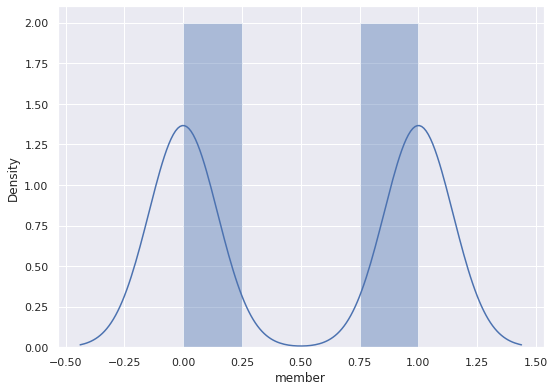

In [358]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

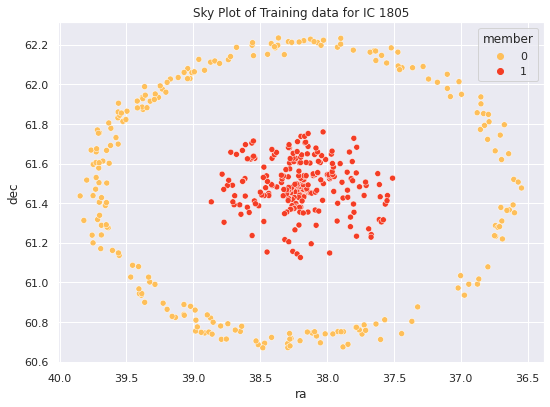

In [359]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for IC 1805')
plt.show()

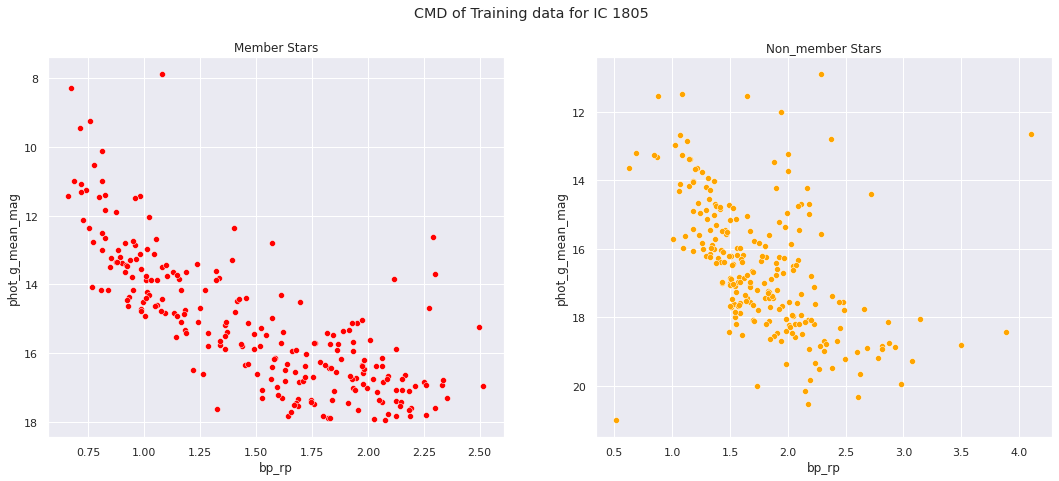

In [360]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for IC 1805 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


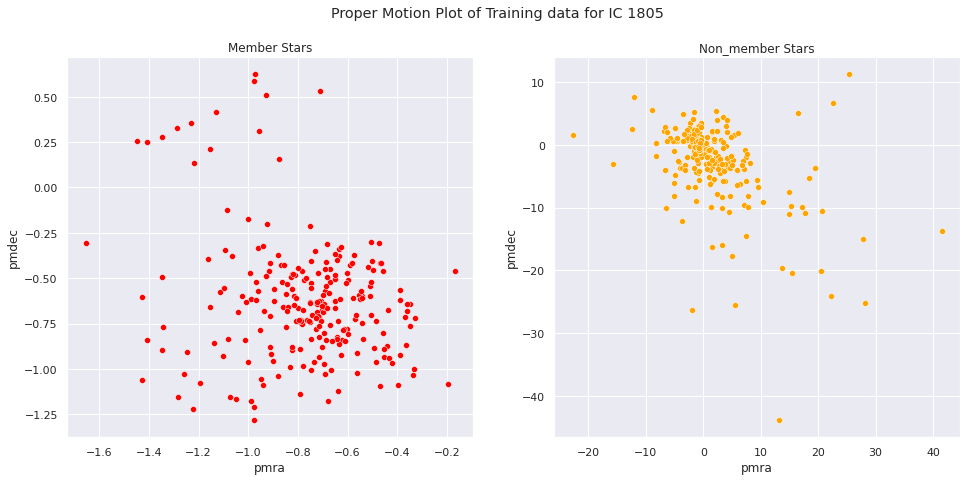

In [361]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for IC 1805 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


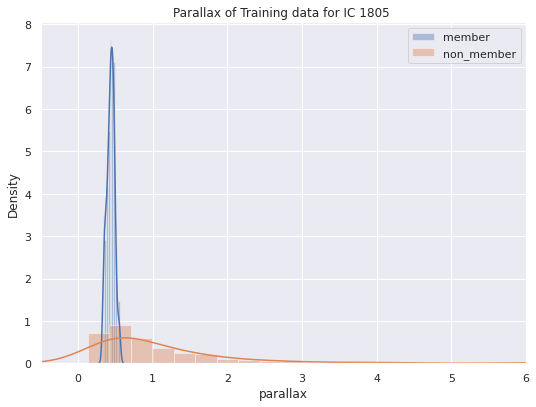

In [362]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for IC 1805 ')
plt.legend()
plt.show()

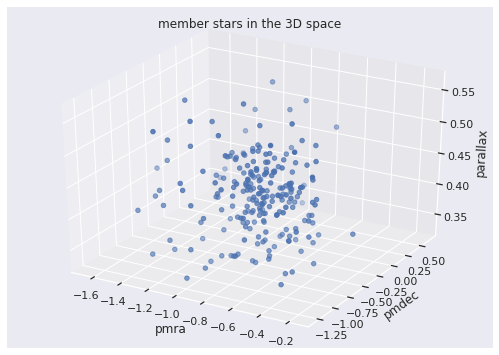

In [363]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


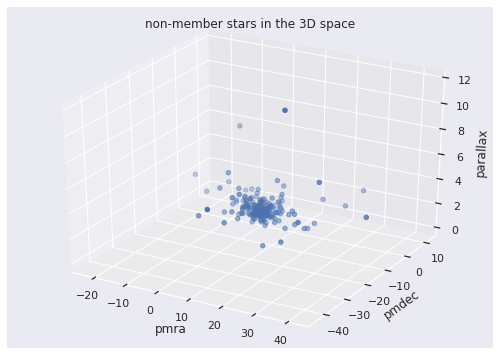

In [364]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [365]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [366]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec       0.376572
parallax    0.368458
pmra        0.254970
dtype: float64

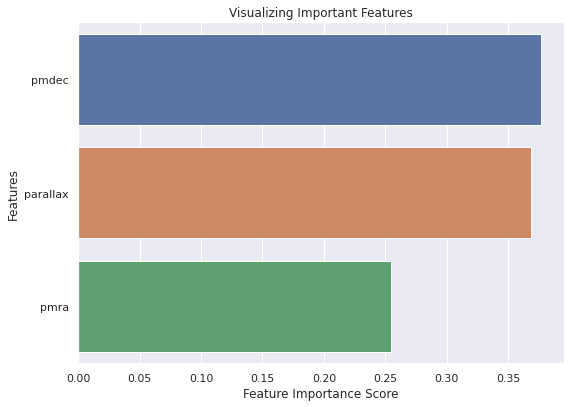

In [367]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [368]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [369]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [370]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [371]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [372]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [373]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [374]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0.0009765625,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.987
Accuracy on test data: 0.993


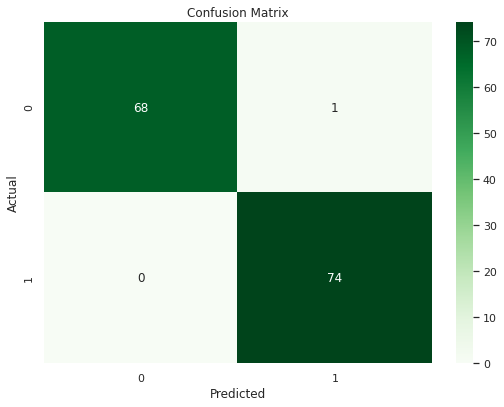

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      1.00      0.99        74

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [375]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 0.958
Precision on testing data: 0.986
Accuracy on test data: 0.986


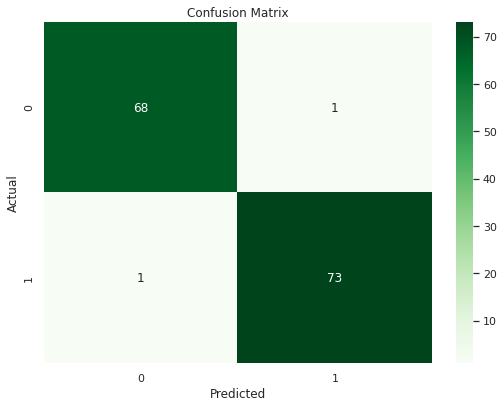

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.99      0.99      0.99        74

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [376]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [377]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center
count,1.448500e+04,1.448500e+04,1.448500e+04,14485.0,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,1.448500e+04,14485.000000,14485.000000,14485.0,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,14485.000000,...,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14485.000000,14358.000000,14359.000000,14358.000000,461.000000,461.000000,14485.000000,461.00000,461.000000,461.000000,14485.000000,14485.000000,14485.000000,14485.000000,7963.000000,7963.000000,7963.000000,7963.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,5950.0,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000,14485.000000,14485.000000,14485.000000,14485.000000
mean,1.635721e+18,4.747415e+17,8.478334e+08,2015.5,38.264166,0.087511,61.475129,0.088732,1.020762,0.121644,15.020234,1.573938,0.136324,-2.154573,0.201195,0.024123,0.029118,-0.751698,-0.060409,-0.043447,-0.037801,-0.237946,-0.026141,0.150464,0.066882,438.187988,14.765827,435.402692,2.785295,4.114369,1.387723e+03,0.275007,17.187576,31.0,16.821054,1.418511,0.019348,-0.032776,49.959130,15.434657,...,2.945292e+04,46.075450,514.914917,15.703432,1.421967,0.081947,1.793020,0.820523,0.972461,-26.886006,1.743978,0.521022,5240.23877,3.437093,-0.066161,134.754527,0.960402,58.871595,43.510158,100050.649881,4408.858398,4233.514648,4710.588379,1.629960,1.364965,1.923504,0.814304,0.677557,0.965696,200111.0,2.919158,2.556185,3.159042,8.381451,7.147809,9.615103,0.526455,59.762596,32.147971,0.526363
std,0.000000e+00,1.883162e+16,4.905780e+08,0.0,0.793970,0.102861,0.410618,0.105229,1.054219,0.142633,23.559433,8.305697,0.165195,6.546589,0.246110,0.148871,0.124612,0.060828,0.103101,0.101520,0.093794,0.175452,0.097985,0.117867,0.114707,75.371785,78.534690,75.034072,4.137500,18.461166,4.606509e+04,0.656672,485.086823,0.0,49.458115,0.091417,0.022849,0.030728,8.585759,1.213173,...,2.770349e+05,590.500611,432.304138,1.638775,0.224829,0.291380,0.445627,0.282768,0.220608,31.040989,2.568486,3.109824,710.67981,0.606443,0.307008,0.383266,0.406806,0.531991,0.404300,310.945913,505.020905,507.383423,510.304504,0.706596,0.698929,0.731475,0.357979,0.351256,0.374497,0.0,4.161367,3.631925,4.542440,73.788422,62.794239,84.942291,0.194249,134.697678,70.159705,0.194207
min,1.635721e+18,4.652406e+17,5.895700e+04,2015.5,36.503672,0.011667,60.651211,0.011563,0.109289,0.016388,3.000348,-57.949551

In [378]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_1805_center'] <= cantat_radius*2]

In [379]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [380]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [381]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [382]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    9435
1     413
Name: member, dtype: int64

In [383]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

413

In [384]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

413

In [385]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member,PMemb
count,4.130000e+02,4.130000e+02,4.130000e+02,413.0,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,411.000000,411.000000,411.000000,413.000000,411.000000,411.000000,411.000000,3.000000,3.000000,413.000000,3.000000,3.0,3.0,413.000000,413.000000,413.000000,413.000000,303.000000,303.000000,303.000000,303.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,241.0,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,413.000000,413.000000,413.000000,413.000000,413.0,413.000000
mean,1.635721e+18,4.731947e+17,7.980802e+08,2015.5,38.234560,0.044085,61.451519,0.044143,0.433646,0.060640,9.732982,-0.875255,0.066873,-0.468161,0.099697,0.034684,0.045470,-0.761798,-0.063014,-0.030757,-0.039916,-0.246641,-0.041693,0.144502,0.082556,437.016949,19.828087,434.389831,2.627119,0.829630,473.930359,0.068526,1.206914,31.0,25.813288,1.462144,0.009682,-0.036215,49.815981,15.585956,...,605.439331,15.039392,1.339269,0.084746,1.581786,0.723613,0.858173,-64.675430,0.565883,0.135593,4666.666504,3.0,0.0,134.750636,0.932659,58.839571,43.494744,100020.917492,4581.766113,4408.579590,4856.307617,2.109720,1.791804,2.510477,1.062606,0.898748,1.269405,200111.0,4.435306,3.862719,4.846385,18.322927,15.754420,20.891417,0.472041,17.615542,6.761315,0.471938,1.0,0.839025
std,0.000000e+00,1.748453e+16,4.899078e+08,0.0,0.693326,0.025932,0.360027,0.025310,0.060081,0.035402,5.373780,0.344751,0.040180,0.465425,0.056378,0.124013,0.121952,0.045204,0.083987,0.094094,0.073391,0.157223,0.094132,0.099490,0.083223,62.141025,89.960520,61.612007,3.986804,5.090714,228.440292,0.123617,4.339908,0.0,59.452114,0.079634,0.005818,0.027213,7.090267,1.090781,...,364.986053,1.420619,0.088644,0.278841,0.438389,0.264548,0.182021,16.164067,0.332836,1.685465,577.350281,0.0,0.0,0.333196,0.358187,0.467380,0.352605,198.336066,578.588501,572.316956,574.078491,0.582816,0.579186,0.482867,0.298155,0.289431,0.249733,0.0,4.382190,3.714967,4.977053,98.330574,86.744476,109.927605,0.129389,11.316327,3.913487,0.129325,0.0,0.141243
min,1.635721e+18,4.652690e+17,1.335950e+05,2015.5,36.818082,0.012574,60.789062,0.013792,0.330173,0.017481,3.015218,-1.664429,0.017901,-1.340654,0.030496,-0.389535,-0.279841,-0.876708,-0.375010,-0.305488,-0.235342,-0.680021,-0.261354,-0.142628,-0.199389,219.000000,0.000000,217.000000,0.000000,-10.706875,195.059265,0.000000,0.000000,31.0,0.398833,1.210200,0.0

In [386]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,2.370000e+02,2.370000e+02,2.370000e+02,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,4.000000,4.000000,237.000000,4.000000,4.000000,4.0000,237.000000,237.000000,237.000000,237.000000,198.000000,198.000000,198.000000,198.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,1.635721e+18,4.655548e+17,8.478835e+08,2015.5,38.194002,0.037564,61.488153,0.038491,0.437246,0.049988,11.968811,-0.771412,0.056904,-0.626431,0.084236,-0.023287,0.052025,-0.757002,0.057237,0.036497,0.044013,-0.276112,-0.033911,0.027420,-0.012209,395.472574,53.021097,392.101266,3.371308,1.184547,444.562592,0.067128,1.052152,31.0,60.382153,1.479734,0.008308,-0.044446,45.012658,15.514768,...,685.564392,14.295773,1.334098,0.168776,1.487658,0.667567,0.820091,-42.153129,2.393810,0.172996,4687.500000,2.625000,0.0625,134.719352,0.957797,58.836194,43.535603,100082.101010,4715.587891,4529.887207,5014.738770,2.193670,1.880604,2.534620,1.108867,0.942173,1.288302,200111.0,5.865198,5.259096,6.319592,65.643898,57.322128,73.965660,0.159410,18.147146,10.058031,0.584388,0.159389,1.0
std,0.000000e+00,9.882209e+13,4.833116e+08,0.0,0.273249,0.022972,0.126619,0.021759,0.051515,0.029915,6.313267,0.254520,0.035316,0.334745,0.047055,0.108359,0.112440,0.032209,0.088823,0.081361,0.089386,0.129730,0.086256,0.088768,0.087676,36.405501,134.006907,36.191555,5.856087,5.841529,202.802246,0.106116,2.999830,0.0,102.540886,0.093107,0.004959,0.032551,4.030058,1.031697,...,485.683716,1.823506,0.109496,0.375347,0.480803,0.277063,0.216880,14.362667,1.581258,1.437847,554.338928,0.853913,0.1250,0.126610,0.130507,0.184020,0.123521,395.288997,727.639526,715.137817,756.673279,0.504829,0.507065,0.432164,0.249023,0.248554,0.224389,0.0,7.147449,6.707637,7.571912,322.742828,280.662262,364.846924,0.095411,10.570753,5.857147,0.305960,0.095402,0.0
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,3.256174,-1.653909,0.019533,-1.281146,0.029553,-0.491299,-0.253159,-0.877849,-0.230253,-0.187959,-0.152813,-0.651846,-0.306789,-0.160690,-0.366241,214.000000,0.000000,210.000000,0.000000,-10.749668,159.062073,0.000000,0.0000

#### Visualization

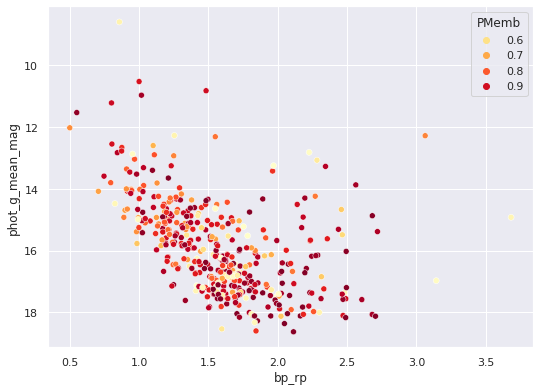

In [387]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

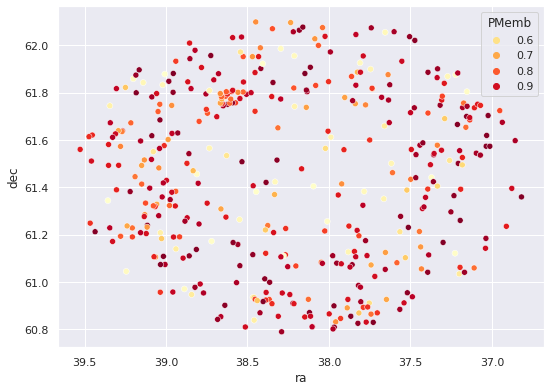

In [388]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

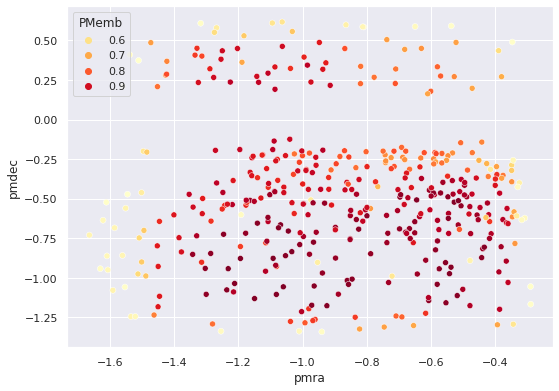

In [389]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


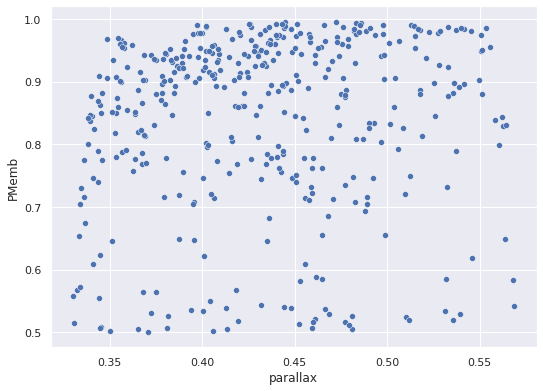

In [390]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [391]:
# saving the files as csv
# all_stars.to_csv('gaia_1805_membership_prob.csv')

potentialMember.to_csv('IC_1805_membership_prob.csv')


### Comparing the old and new predicted members

In [392]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [393]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member,PMemb
count,6.500000e+02,6.500000e+02,6.500000e+02,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,...,648.000000,648.000000,648.000000,650.000000,648.000000,648.000000,648.000000,7.000000,7.000000,650.000000,7.000000,7.000000,7.000000,650.000000,650.000000,650.000000,650.000000,501.000000,501.000000,501.000000,501.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,399.0,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,650.000000,650.000000,650.000000,650.000000,650.0,650.000000
mean,1.635721e+18,4.704091e+17,8.162392e+08,2015.5,38.219772,0.041708,61.464876,0.042082,0.434959,0.056756,10.548200,-0.837392,0.063238,-0.525869,0.094060,0.013547,0.047860,-0.760050,-0.019169,-0.006235,-0.009314,-0.257386,-0.038856,0.101812,0.048003,421.869231,31.930769,418.970769,2.898462,0.959039,463.222595,0.068016,1.150485,31.0,38.417641,1.468557,0.009181,-0.039216,48.064615,15.560000,...,634.744568,14.767415,1.337378,0.115385,1.547359,0.703115,0.844245,-51.805544,1.610413,0.149231,4678.571289,2.785714,0.035714,134.739229,0.941824,58.838340,43.509642,100045.097804,4634.654297,4456.522461,4918.919922,2.143999,1.828064,2.520336,1.081496,0.916480,1.277121,200111.0,5.001530,4.415669,5.429759,37.061558,32.214813,41.908272,0.358051,17.809373,7.963348,0.357978,1.0,0.746181
std,0.000000e+00,1.440894e+16,4.877304e+08,0.0,0.576795,0.025073,0.297367,0.024212,0.057092,0.033873,5.829714,0.318606,0.038749,0.429039,0.053650,0.121707,0.118527,0.040985,0.103451,0.095274,0.089214,0.148370,0.091349,0.111039,0.096311,57.738957,109.193978,57.454805,4.763319,5.374888,219.736740,0.117456,3.903162,0.0,79.652969,0.085146,0.005556,0.029515,6.570617,1.069366,...,414.670868,1.618721,0.096741,0.319732,0.456253,0.270333,0.196188,18.307517,1.497257,1.598596,514.665833,0.636209,0.094491,0.276648,0.296288,0.388574,0.291313,293.632492,644.277710,634.714722,656.243835,0.551655,0.550417,0.461117,0.278975,0.273231,0.238920,0.0,5.676472,5.151505,6.170443,217.845901,189.802170,245.910309,0.191354,11.045068,4.971849,0.191293,0.0,0.248495
min,1.635721e+18,4.652690e+17,1.335950e+05,2015.5,36.818082,0.012574,60.789062,0.013695,0.330173,0.016679,3.015218,-1.664429,0.017901,-1.340654,0.029553,-0.491299,-0.279841,-0.877849,-0.375010,-0.305488,-0.235342,-0.680021,-0.306789,-0.160690,-0.366241,214.000000,0.000000,210.000000,0.000000,-10.749668,159.062073,0.00

In [394]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,2.370000e+02,2.370000e+02,2.370000e+02,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,4.000000,4.000000,237.000000,4.000000,4.000000,4.0000,237.000000,237.000000,237.000000,237.000000,198.000000,198.000000,198.000000,198.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,158.0,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,1.635721e+18,4.655548e+17,8.478835e+08,2015.5,38.194002,0.037564,61.488153,0.038491,0.437246,0.049988,11.968811,-0.771412,0.056904,-0.626431,0.084236,-0.023287,0.052025,-0.757002,0.057237,0.036497,0.044013,-0.276112,-0.033911,0.027420,-0.012209,395.472574,53.021097,392.101266,3.371308,1.184547,444.562592,0.067128,1.052152,31.0,60.382153,1.479734,0.008308,-0.044446,45.012658,15.514768,...,685.564392,14.295773,1.334098,0.168776,1.487658,0.667567,0.820091,-42.153129,2.393810,0.172996,4687.500000,2.625000,0.0625,134.719352,0.957797,58.836194,43.535603,100082.101010,4715.587891,4529.887207,5014.738770,2.193670,1.880604,2.534620,1.108867,0.942173,1.288302,200111.0,5.865198,5.259096,6.319592,65.643898,57.322128,73.965660,0.159410,18.147146,10.058031,0.584388,0.159389,1.0
std,0.000000e+00,9.882209e+13,4.833116e+08,0.0,0.273249,0.022972,0.126619,0.021759,0.051515,0.029915,6.313267,0.254520,0.035316,0.334745,0.047055,0.108359,0.112440,0.032209,0.088823,0.081361,0.089386,0.129730,0.086256,0.088768,0.087676,36.405501,134.006907,36.191555,5.856087,5.841529,202.802246,0.106116,2.999830,0.0,102.540886,0.093107,0.004959,0.032551,4.030058,1.031697,...,485.683716,1.823506,0.109496,0.375347,0.480803,0.277063,0.216880,14.362667,1.581258,1.437847,554.338928,0.853913,0.1250,0.126610,0.130507,0.184020,0.123521,395.288997,727.639526,715.137817,756.673279,0.504829,0.507065,0.432164,0.249023,0.248554,0.224389,0.0,7.147449,6.707637,7.571912,322.742828,280.662262,364.846924,0.095411,10.570753,5.857147,0.305960,0.095402,0.0
min,1.635721e+18,4.654750e+17,1.440812e+07,2015.5,37.509657,0.012867,61.125531,0.013695,0.330794,0.016679,3.256174,-1.653909,0.019533,-1.281146,0.029553,-0.491299,-0.253159,-0.877849,-0.230253,-0.187959,-0.152813,-0.651846,-0.306789,-0.160690,-0.366241,214.000000,0.000000,210.000000,0.000000,-10.749668,159.062073,0.000000,0.0000

In [395]:
concatenated.dataset.value_counts()

New_member    413
Old_member    237
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

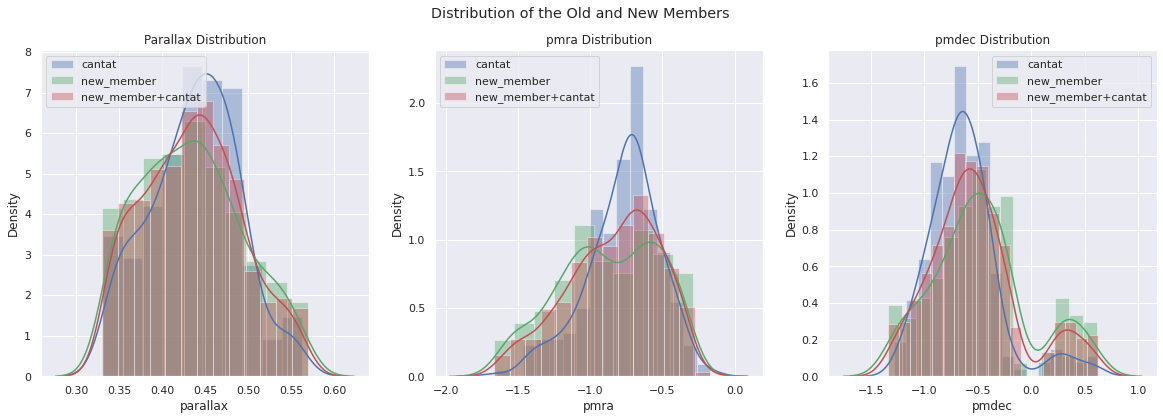

In [396]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


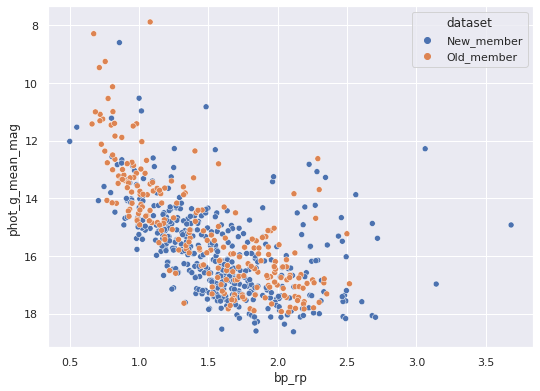

In [397]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

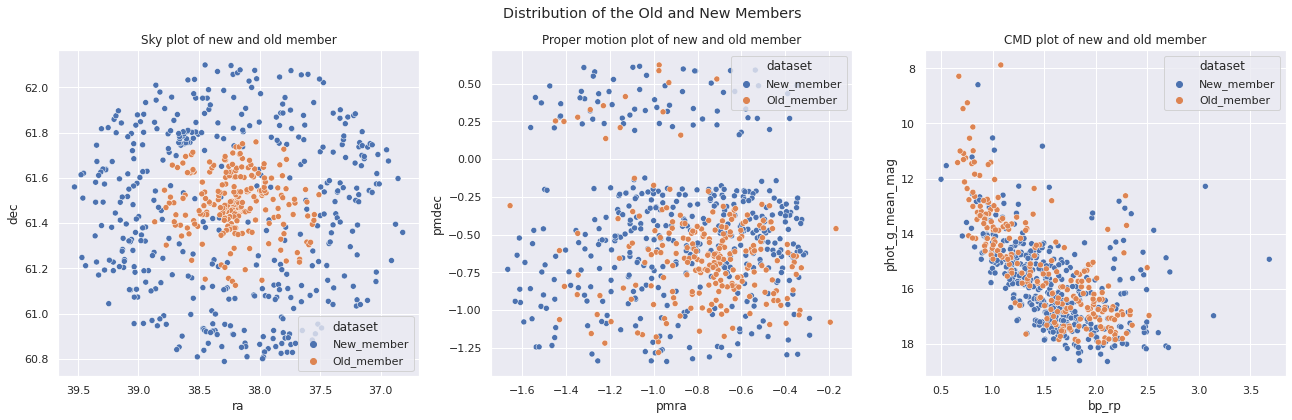

In [398]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
skyplot.invert_xaxis()
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

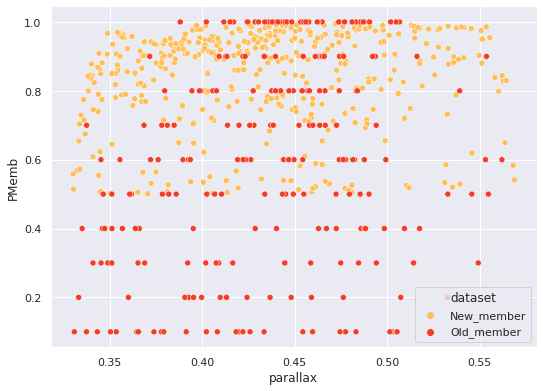

In [399]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [400]:
# pd_prof.ProfileReport(potentialMember)

In [401]:
#files.download('IC_1805_cantat.csv')

#files.download('IC_1805_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


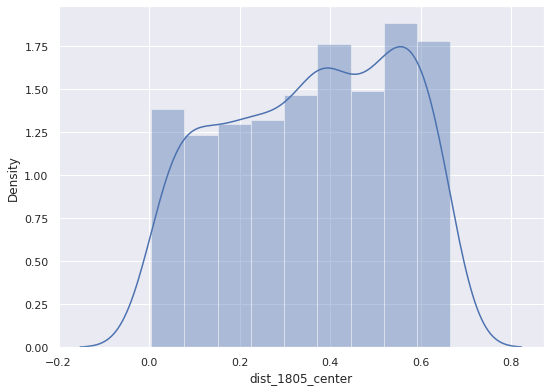

In [402]:
sns.distplot(concatenated['dist_1805_center'])

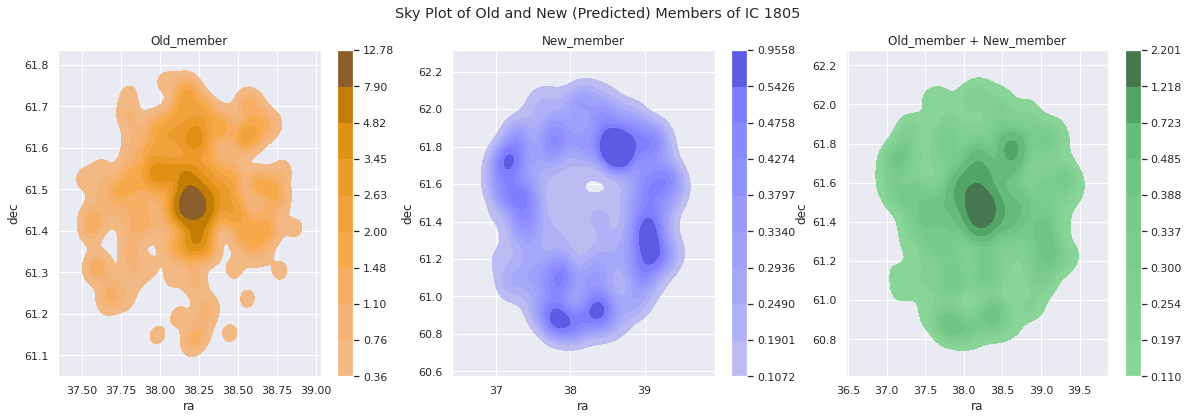

In [403]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of IC 1805')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

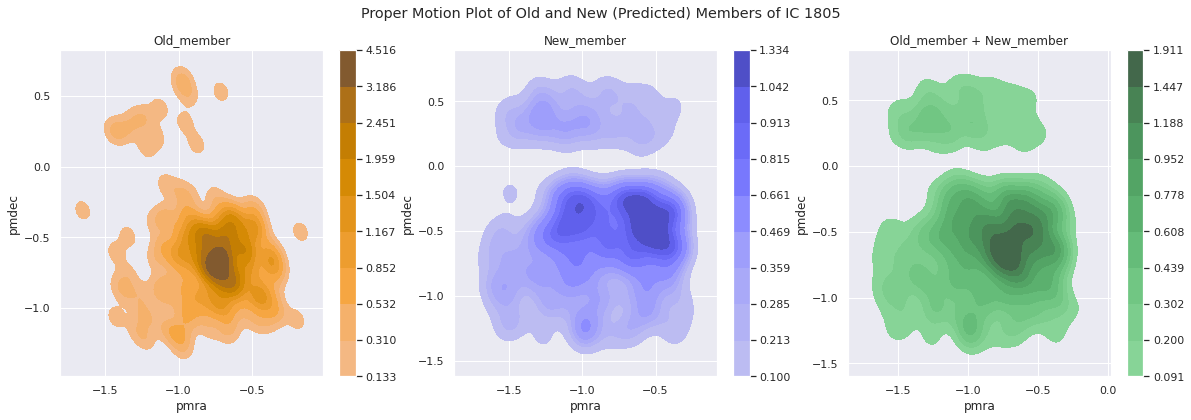

In [404]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of IC 1805')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [405]:
#files.download('IC_1805_cantat.csv')

potentialMember.to_csv('IC_1805_additional_member_prob.csv')
concatenated.to_csv('IC_1805_all_member_prob.csv')

files.download('IC_1805_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('IC_1805_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>